**Q1. What is the L1 norm and L2 norm? How are they different?**

### 🔹 Simple Definitions

- **L1 norm (Manhattan distance):**  
  Add up the absolute values of the numbers.  
  → Like walking in a grid city (up/down + left/right).  

  Formula:  
  $$\|x\|_1 = |x_1| + |x_2| + \dots + |x_n|$$

- **L2 norm (Euclidean distance):**
  Usual straight-line distance from the origin.
  → Like measuring with a ruler.

  Formula:
  $$\|x\|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$

---

### 🔹 Where They Are Used

- **L1 norm**  
  - **Feature selection**: pushes some weights to exactly zero → model ignores unimportant features.  
    👉 Example: **Lasso Regression**.  
  - **Sparse data problems**: e.g., text classification, when many features are irrelevant.

- **L2 norm**  
  - **Regularization**: spreads out weights smoothly, avoids one huge weight dominating.  
    👉 Example: **Ridge Regression**, **weight decay in neural networks**.  
  - **Measuring distances**: in geometry, clustering (like k-means), nearest neighbors.

---

✅ **Key takeaway**:  
- L1 = “sum of steps” → good for **choosing only important features**.  
- L2 = “straight line” → good for **keeping weights small and stable**.


In [1]:
import numpy as np

# Example vector
x = np.array([3, -4, 12])

# L1 norm = sum of absolute values
l1 = np.sum(np.abs(x))

# L2 norm = square root of sum of squares
l2 = np.sqrt(np.sum(x**2))

print("Vector:", x)
print("L1 norm (sum of absolute values):", l1)
print("L2 norm (Euclidean distance):", l2)

# Show step-by-step calculations
print("\nStep-by-step:")
print("Absolute values:", np.abs(x), " -> sum =", l1)
print("Squares:", x**2, " -> sum =", np.sum(x**2), " -> sqrt =", l2)


Vector: [ 3 -4 12]
L1 norm (sum of absolute values): 19
L2 norm (Euclidean distance): 13.0

Step-by-step:
Absolute values: [ 3  4 12]  -> sum = 19
Squares: [  9  16 144]  -> sum = 169  -> sqrt = 13.0


**Q2. What is the dot product and why is it useful in ML?**

### 🔹 Simple Definition

- The **dot product** of two vectors multiplies their corresponding entries and adds them up:

$$x \cdot y = \sum_{i=1}^n x_i y_i$$

- Intuition:
  - Measures **similarity** between two vectors.
  - If they point in the same direction → large positive value.
  - If orthogonal (90° apart) → zero.
  - If opposite → negative value.

---

### 🔹 Why is it useful in Machine Learning?

- **Similarity measure**:
  - Used in **cosine similarity** (dot product after normalization).
  - Compares text embeddings, images, or any feature vectors.

- **Projections**:
  - Projects one vector onto another → useful in dimensionality reduction.

- **Neural networks**:
  - A linear layer is basically a dot product between input features and weights.
  - Forms the backbone of deep learning computations.

- **Geometry**:
  - Angle between vectors can be derived from dot product:

$$\cos(\theta) = \frac{x \cdot y}{\|x\| \|y\|}$$

In [2]:
import numpy as np

# Two similar vectors
a = np.array([1, 2])
b = np.array([2, 4])  # same direction as a (scaled)

# Two far/orthogonal vectors
c = np.array([1, 0])
d = np.array([0, 1])  # perpendicular to c

# Compute dot products
dot_ab = np.dot(a, b)
dot_cd = np.dot(c, d)

print("Vector a:", a)
print("Vector b:", b)
print("Dot(a, b):", dot_ab, "-> Large positive (similar direction)")

print("\nVector c:", c)
print("Vector d:", d)
print("Dot(c, d):", dot_cd, "-> Zero (completely different directions)")

# Angle between vectors
def angle(x, y):
    cos_theta = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return np.degrees(np.arccos(cos_theta))

print("\nAngle between a and b:", angle(a, b), "degrees")
print("Angle between c and d:", angle(c, d), "degrees")

Vector a: [1 2]
Vector b: [2 4]
Dot(a, b): 10 -> Large positive (similar direction)

Vector c: [1 0]
Vector d: [0 1]
Dot(c, d): 0 -> Zero (completely different directions)

Angle between a and b: 1.2074182697257333e-06 degrees
Angle between c and d: 90.0 degrees


**Q3. What does variance and covariance tell us?**

### 🔹 Simple Definitions

- **Variance**
  - Tells us how much a single variable **spreads out** from its mean.
  - High variance = data is widely scattered.
  - Low variance = data is tightly clustered.

  Formula:
  $$\text{Var}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu_X)^2$$

- **Covariance**
  - Tells us how **two variables move together**.
  - Positive → both rise/fall together.
  - Negative → one rises while the other falls.
  - Near zero → little or no linear relationship.

  Formula:
  $$\text{Cov}(X,Y) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu_X)(y_i - \mu_Y)$$

---

### 🔹 Why are they useful in ML?

- **Variance**:
  - Helps understand the **spread** of features.
  - Large variance may dominate training → needs normalization.

- **Covariance**:
  - Detects **relationships** between features.
  - Basis for **Principal Component Analysis (PCA)**, which finds directions of maximum variance.
  - Helps identify redundancy (e.g., two features carrying the same information).

In [3]:
import numpy as np

# Smaller vectors for readability
np.random.seed(42)  # reproducibility
X = np.random.randn(8)          # random variable
Y = 2*X + np.random.randn(8)*0.5  # strongly related to X

print("Vector X:", np.round(X, 2))
print("Vector Y:", np.round(Y, 2))

# Variance of X
# Stats for X
mean_X = np.mean(X)
var_X = np.var(X)
min_X = np.min(X)
max_X = np.max(X)

print("\nStatistics for X:")
print("Mean:", round(mean_X, 3))
print("Variance:", round(var_X, 3))
print("Min:", round(min_X, 3))
print("Max:", round(max_X, 3))

# Covariance of X and Y
cov_XY = np.cov(X, Y)[0, 1]

print("\nVariance of X:", round(var_X, 3))
print("Covariance of X,Y:", round(cov_XY, 3))

# Compare with unrelated variable
Z = np.random.randn(8)  # independent random variable
print("Vector Z:", np.round(Z, 2))

cov_XZ = np.cov(X, Z)[0, 1]

print("Covariance of X,Z (independent):", round(cov_XZ, 3))


Vector X: [ 0.5  -0.14  0.65  1.52 -0.23 -0.23  1.58  0.77]
Vector Y: [ 0.76 -0.01  1.06  2.81 -0.35 -1.42  2.3   1.25]

Statistics for X:
Mean: 0.551
Variance: 0.471
Min: -0.234
Max: 1.579

Variance of X: 0.471
Covariance of X,Y: 0.975
Vector Z: [-1.01  0.31 -0.91 -1.41  1.47 -0.23  0.07 -1.42]
Covariance of X,Z (independent): -0.405


**Q4. What is Bayes’ rule and why is it important?**

### 🔹 Simple Definition

Bayes’ rule helps us **update our belief** about an event when we get new evidence.

Formula:

$$
P(A|B) = \frac{P(B|A) \, P(A)}{P(B)}
$$

- \(P(A)\): **Prior** → what we believed before seeing the evidence.
- \(P(B|A)\): **Likelihood** → how likely the evidence is if \(A\) is true.
- \(P(A|B)\): **Posterior** → updated belief after seeing the evidence.
- \(P(B)\): Normalizing constant (total probability of evidence).

---

### 🔹 Why is it important in ML?

- **Spam filtering**: Update probability that an email is spam given it contains certain words.
- **Medical diagnosis**: Update probability of disease given a test result.
- **Machine learning & AI**: Core of Bayesian inference, probabilistic models, and Naive Bayes classifier.

---

### 🔹 Example in Python

Suppose:  
- \(P(\text{Spam}) = 0.2\)  
- \(P(\text{NotSpam}) = 0.8\)  
- \(P(\text{Word}="WIN" | \text{Spam}) = 0.9\)  
- \(P(\text{Word}="WIN" | \text{NotSpam}) = 0.1\)  

We want:  

$$
P(\text{Spam} | \text{Word}="WIN") = 
\frac{P(\text{Word}="WIN" | \text{Spam}) \cdot P(\text{Spam})}{P(\text{Word}="WIN")}
$$

With denominator:  

$$
P(\text{Word}="WIN") = P(\text{Word}="WIN" | \text{Spam})P(\text{Spam}) + P(\text{Word}="WIN" | \text{NotSpam})P(\text{NotSpam})
$$

In [4]:
# Priors
P_spam = 0.2
P_notspam = 1 - P_spam

# Likelihoods
P_word_given_spam = 0.9
P_word_given_notspam = 0.1

# Step 1: Numerator
numerator = P_word_given_spam * P_spam

# Step 2: Denominator (law of total probability)
denominator = (P_word_given_spam * P_spam) + (P_word_given_notspam * P_notspam)

# Step 3: Posterior
posterior = numerator / denominator

# Print results clearly
print("Prior P(Spam):", P_spam)
print("Likelihood P(Word|Spam):", P_word_given_spam)
print("Likelihood P(Word|NotSpam):", P_word_given_notspam)
print("Numerator = P(Word|Spam)*P(Spam) =", round(numerator, 3))
print("Denominator = P(Word) =", round(denominator, 3))
print("Posterior P(Spam|Word) =", round(posterior, 3))

Prior P(Spam): 0.2
Likelihood P(Word|Spam): 0.9
Likelihood P(Word|NotSpam): 0.1
Numerator = P(Word|Spam)*P(Spam) = 0.18
Denominator = P(Word) = 0.26
Posterior P(Spam|Word) = 0.692


**Q5. What are the Law of Large Numbers (LLN) and Central Limit Theorem (CLT)? Why do they matter?**

### 🔹 Law of Large Numbers (LLN)

- As the sample size increases, the **sample average** converges to the **true mean** of the population.  
- In other words: with more data, your estimate gets closer to reality.  

Formula (weak form):  

$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \;\; \xrightarrow[n \to \infty]{} \;\; \mu
$$

- Example: flipping a fair coin — the proportion of heads approaches 0.5 as flips grow.

---

### 🔹 Central Limit Theorem (CLT)

- Regardless of the original distribution, the distribution of **sample means** approaches a **normal distribution** as \(n\) grows (if variance is finite).  

Formula:  

$$
\frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}} \;\;\xrightarrow{d}\;\; N(0,1)
$$

- Meaning: standardized averages look normal, even if the underlying data isn’t.  
- Example: averages of dice rolls → bell curve.

---

### 🔹 Why they matter in ML/Stats?

- **LLN**: Guarantees that more data → better estimates.  
- **CLT**: Explains why the **normal distribution** shows up everywhere, enabling confidence intervals and hypothesis testing.  

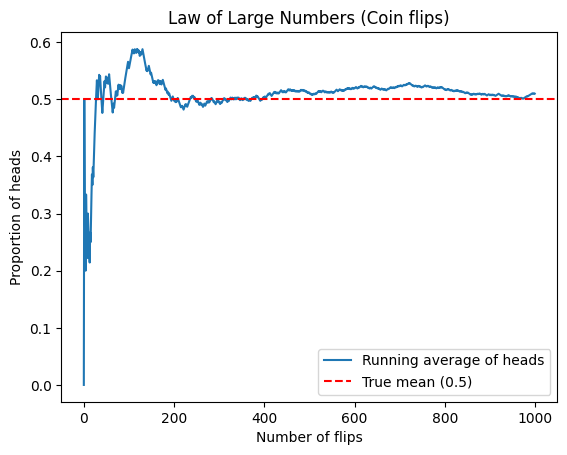

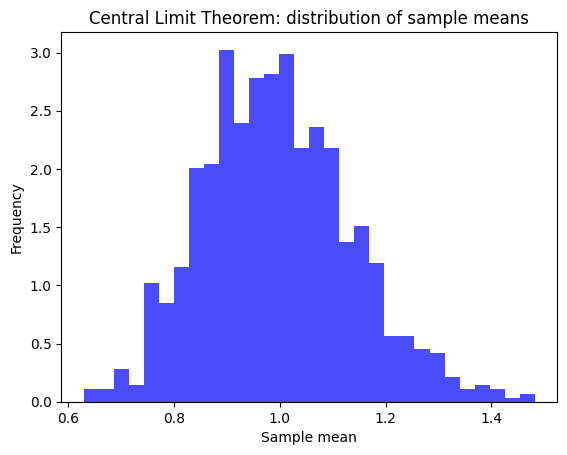

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Law of Large Numbers demo
coin_flips = np.random.randint(0, 2, size=1000)  # 0 = tails, 1 = heads
running_avg = np.cumsum(coin_flips) / np.arange(1, 1001)

plt.plot(running_avg, label="Running average of heads")
plt.axhline(0.5, color="red", linestyle="--", label="True mean (0.5)")
plt.title("Law of Large Numbers (Coin flips)")
plt.xlabel("Number of flips")
plt.ylabel("Proportion of heads")
plt.legend()
plt.show()

# Central Limit Theorem demo
# Population: exponential distribution (not normal!)
population = np.random.exponential(scale=1.0, size=100000)

# Take many sample means
sample_means = [np.mean(np.random.choice(population, size=50)) for _ in range(1000)]

plt.hist(sample_means, bins=30, density=True, alpha=0.7, color="blue")
plt.title("Central Limit Theorem: distribution of sample means")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()

**Q6. What is the bias–variance tradeoff?**

### 🔹 Simple Definitions

- **Bias**  
  - Error due to simplifying assumptions in the model.  
  - High bias → underfitting (model too simple, misses patterns).  

- **Variance**  
  - Error due to sensitivity to training data fluctuations.  
  - High variance → overfitting (model too complex, memorizes noise).  

- **Tradeoff**  
  - Total prediction error can be decomposed into:  

$$
\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible noise}
$$

- Goal: find the **sweet spot** between bias and variance for best generalization.

---

### 🔹 Why is it important in ML?

- **High-bias models**: Linear regression on non-linear data → misses patterns.  
- **High-variance models**: Deep trees without pruning → memorize noise.  
- Understanding the tradeoff guides **model choice, regularization, and complexity control**.  

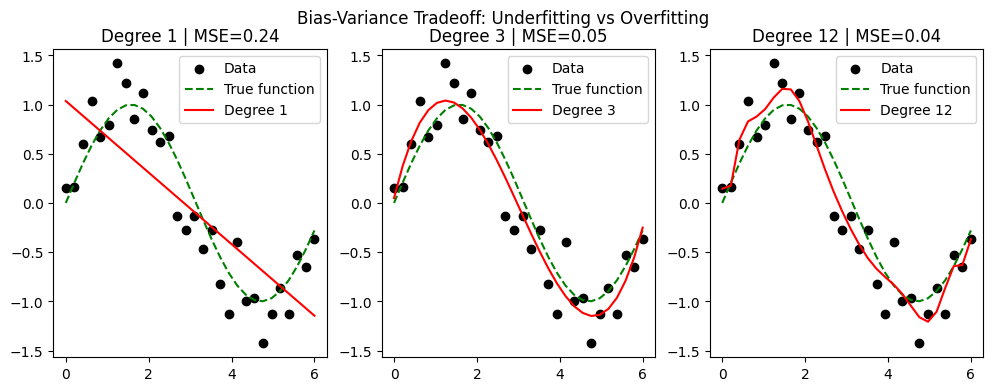

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# True function: sine curve
X = np.linspace(0, 6, 30)
y_true = np.sin(X)
y = y_true + np.random.normal(scale=0.3, size=len(X))  # noisy observations
X = X.reshape(-1, 1)

# Try different polynomial degrees
degrees = [1, 3, 12]
plt.figure(figsize=(12, 4))

for i, deg in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color="black", label="Data")
    plt.plot(X, y_true, "g--", label="True function")
    plt.plot(X, y_pred, "r", label=f"Degree {deg}")
    plt.title(f"Degree {deg} | MSE={mean_squared_error(y, y_pred):.2f}")
    plt.legend()

plt.suptitle("Bias-Variance Tradeoff: Underfitting vs Overfitting")
plt.show()